Aprendendo um pouco sobre Cluster utilizando o K-Means.

Base de dados Utilizada foi https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

## Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading Data

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\Python Files\Bases Kaggle\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


CostumerID - Unique ID assigned to the customer

Gender - Gender of the customer

Age - Age of the customer

Annual Income (k$) - Annual Income of the customee

Spending Score (1-100) - Score assigned by the mall based on customer behavior and spending nature

In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df = df.rename(columns = {'Annual Income (k$)': 'Annual_income',
                         'Spending Score (1-100)': 'Spending_score'})

In [6]:
df.head()

,CustomerID,Gender,Age,Annual_income,Spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Explorando dados

Female    112
Male       88
Name: Gender, dtype: int64

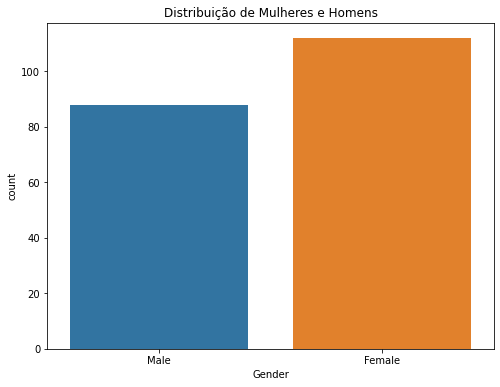

In [7]:
display(df['Gender'].value_counts())

plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'Gender')

plt.title('Distribuição de Mulheres e Homens', fontsize = 12);

Vamos plotar a distribuição de Renda Anual geral e por Gênero

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


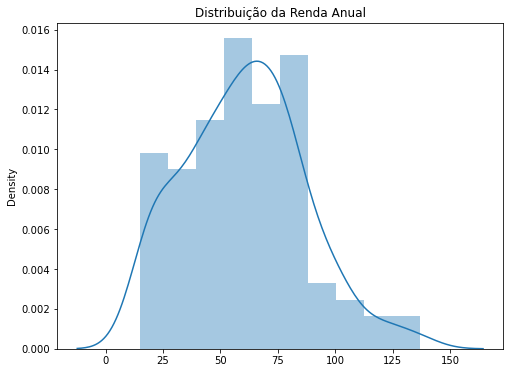

In [8]:
plt.figure(figsize = (8,6))
sns.distplot(x = df['Annual_income'])
plt.title('Distribuição da Renda Anual', fontsize = 12);

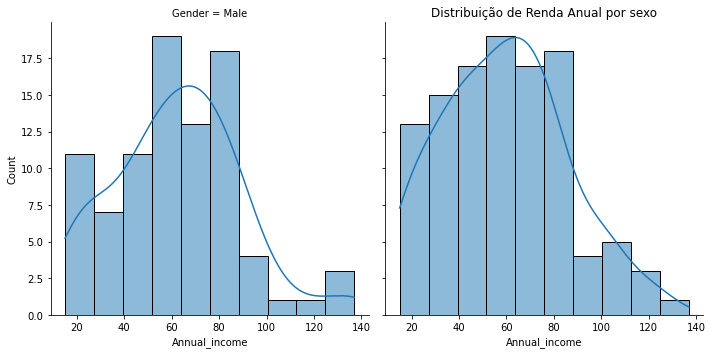

In [9]:
sns.displot(df, x = 'Annual_income', col = 'Gender', kde = True);
plt.title('Distribuição de Renda Anual por sexo');

Os dois gráficos apresentam uma cauda pra direita, significando que existem pessoas com uma renda anual mais alta..

Para ambos os sexos o ponto mais alto fica entre 60 e 80 de Renda Anual

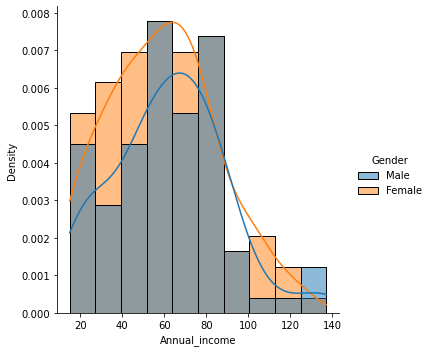

In [10]:
sns.displot(df, x="Annual_income", hue="Gender", stat="density", kde = True)

## esse gráfico achei bacana mas creio que prejudica o entendimento da distribuição

Vamos ver a distribuição agora de Spending Score

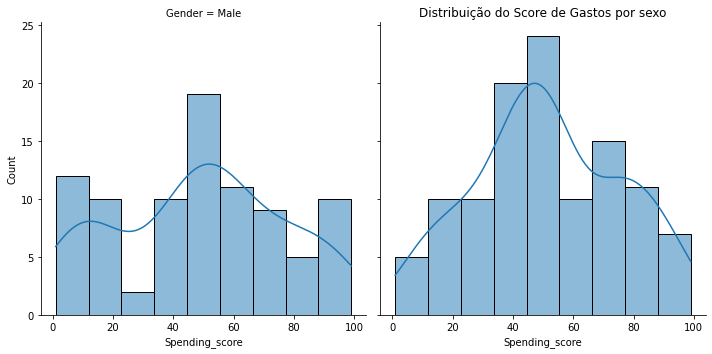

In [11]:
sns.displot(df, x = 'Spending_score', col = 'Gender', kde = True);
plt.title('Distribuição do Score de Gastos por sexo');

## Utilizando Pairplot

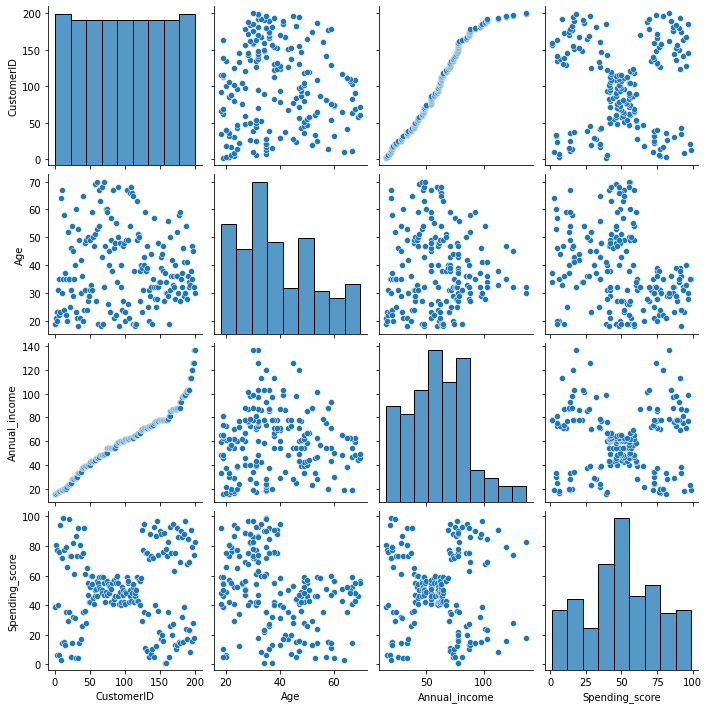

In [12]:
sns.pairplot(df)

Conseguimos visualizar que temos alguns clusters.... 

## Importando o sklearn

In [13]:
from sklearn.cluster import KMeans

In [14]:
# instanciando o modelom k = 4
estimador = KMeans(n_clusters = 4, max_iter = 1000)

In [15]:
## salvando a variável X

X = df.drop(columns = ['CustomerID','Gender'])

X.head()

,Age,Annual_income,Spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [16]:
## treinando o modelo
modelo = estimador.fit(X)

In [17]:
# aqui é criado as predições
clusters = modelo.predict(X)

In [18]:
## criando nova coluna com as predições
clustered_data = pd.concat([pd.DataFrame(X), pd.Series(clusters)], axis = 1)

## renomeando o nome da coluna
clustered_data.columns = ['Age','Annual_income','Spending_score','cluster']


In [19]:
clustered_data.head()

,Age,Annual_income,Spending_score,cluster
0,19,15,39,3
1,21,15,81,3
2,20,16,6,0
3,23,16,77,3
4,31,17,40,0


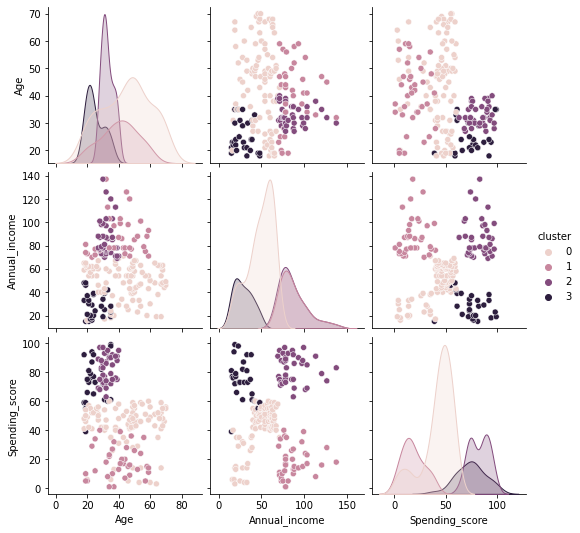

In [20]:
sns.pairplot(clustered_data, hue = 'cluster')

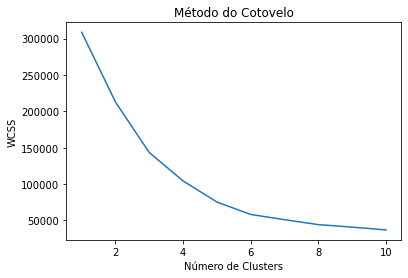

In [21]:
#inicializamos uma lista vazia para armazenar a inercia de cada modelo com um k diferente
#a inercia é a soma dos quadrados das distâncias dos pontos ao cluster mais próximo, e funciona como uma espécie de erro.
inercia = []

#criamos um iterável para os valores de k que vamos testar. Neste caso, testaremos de 1 a 10!
lista_k = range(1, 11)

#aqui vamos fitar o modelo e atualizar nossa lista de inercias
for k in lista_k:
    #aqui fitamos o modelo
    kmeans = KMeans(n_clusters=k).fit(X)
    
    #aqui apendamos a inercia do modelo com o k atual à nossa lista
    #a inerrcia é a propriedade ".inertia_" do modelo!
    inercia.append(kmeans.inertia_)

# Aqui plotamos a inercia em função do k!
plt.plot(range(1, 11), inercia)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
#a inercia também é chamada de WCSS
plt.ylabel('WCSS')
plt.show()

## Talvez a melhor quantidade de cluster é com 6 ?

In [22]:
# instanciando o modelom k = 6
estimador2 = KMeans(n_clusters = 6, max_iter = 1000)


X2 = df.drop(columns = ['CustomerID','Gender'])

X2.head()

## treinando o modelo
modelo2 = estimador2.fit(X2)



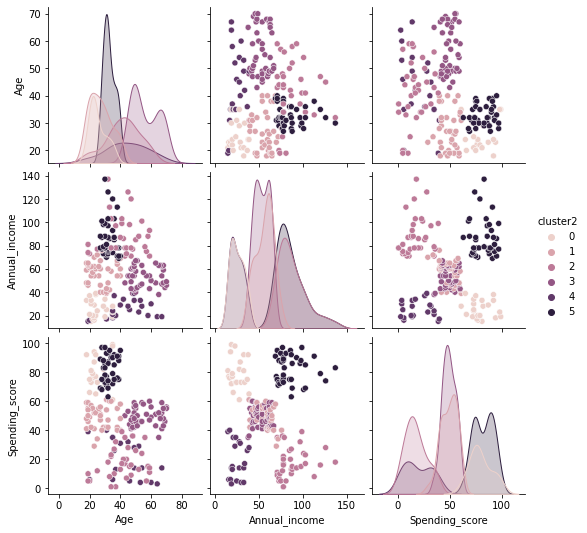

In [23]:
# aqui é criado as predições
clusters2 = modelo2.predict(X2)


## criando nova coluna com as predições
clustered_data2 = pd.concat([pd.DataFrame(X2), pd.Series(clusters2)], axis = 1)

## renomeando o nome da coluna
clustered_data2.columns = ['Age','Annual_income','Spending_score','cluster2']

sns.pairplot(clustered_data2, hue = 'cluster2')

## Vamos explorar esses Clusters

Agora que identificamos os clusters vamos ver o que conseguimos aproveitar deles.

Por exemplo, quais os padrões de idade dos clusters, onde está o rating score deles ou a renda anual

In [24]:
clustered_data2['cluster2'].unique().tolist()

[4, 0, 3, 1, 5, 2]

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


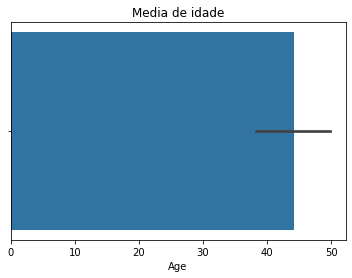

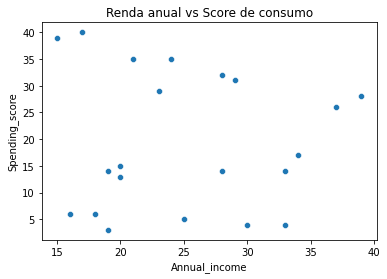

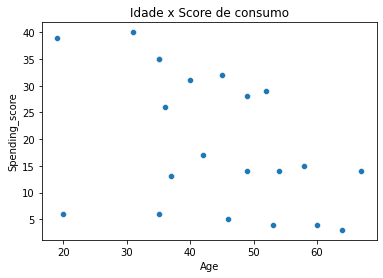

------------------------- Para o Cluster 4 -----------------------


C:\Users\user\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


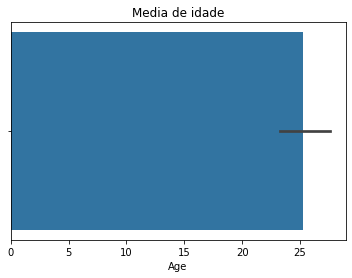

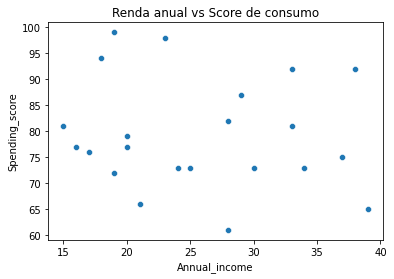

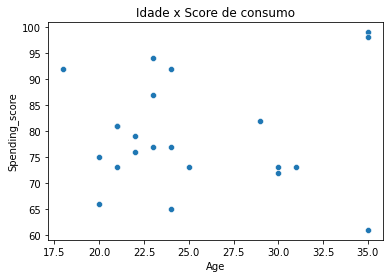

------------------------- Para o Cluster 0 -----------------------


C:\Users\user\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


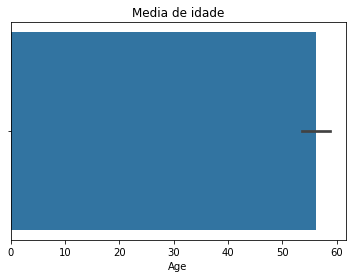

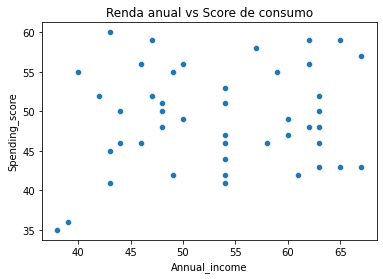

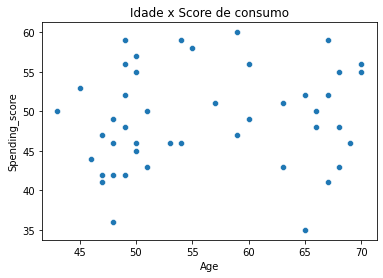

------------------------- Para o Cluster 3 -----------------------


C:\Users\user\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


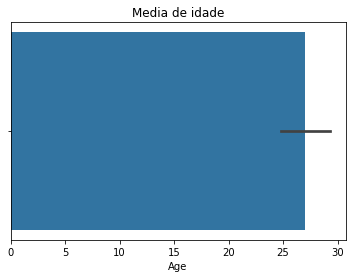

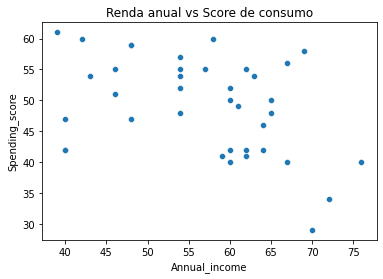

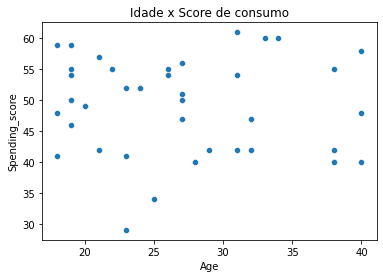

------------------------- Para o Cluster 1 -----------------------


C:\Users\user\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


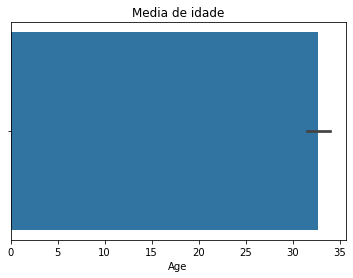

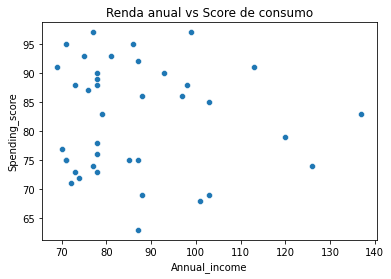

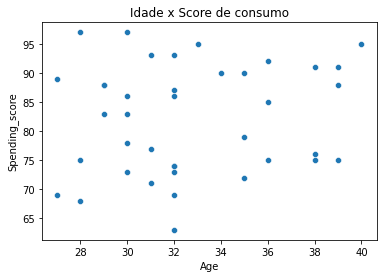

------------------------- Para o Cluster 5 -----------------------


C:\Users\user\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


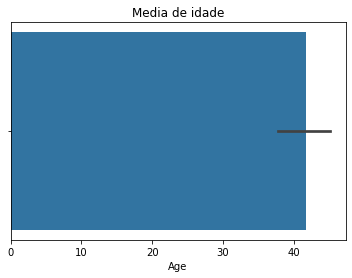

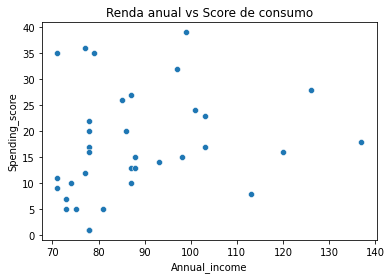

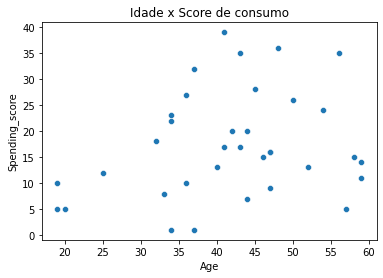

------------------------- Para o Cluster 2 -----------------------
Fim da Análise Exploratória Básica


In [25]:
for cluster in clustered_data2['cluster2'].unique().tolist():
    dataframe = clustered_data2[clustered_data2['cluster2'] == cluster]
    sns.barplot(data = dataframe, x = 'Age', orient = 'v')
    plt.title('Media de idade', fontsize = 12)
    plt.show()
    
    sns.scatterplot(data = dataframe, x = 'Annual_income', y = 'Spending_score')
    plt.title('Renda anual vs Score de consumo', fontsize = 12)
    plt.show()
    
    sns.scatterplot(data = dataframe, x = 'Age',y = 'Spending_score')
    plt.title('Idade x Score de consumo', fontsize = 12)
    plt.show()
    
    
    print("------------------------- Para o Cluster", cluster, "-----------------------")

print('Fim da Análise Exploratória Básica')
    

##  Conclusões de alguns clusters

Foi legal essa análise mas podemos ver que existem ainda muitos dados dispersos. Para todos os clusters observando os gráficos de dispersão obtiveram dados muito dispersos entre eles. Será que está correto ?


Além disso existem cluster com muito mais pontos.. vamos testar ?

In [26]:
clustered_data2['cluster2'].value_counts()

3    45
5    39
1    38
2    35
0    22
4    21
Name: cluster2, dtype: int64

De fato existem clusters mais presentes no nosso dataset, por exemplo o cluster **5, 0, 2 e 1**. Em contrapartida os clusters **4 e 3** somente com 22 e 21 pontos respectivamente.

In [27]:
# colocando a coluna gender novamente... tinha retirado por causa do modelo de K-means
clustered_data2['Gender'] = df['Gender']

clustered_data2.head()

,Age,Annual_income,Spending_score,cluster2,Gender
0,19,15,39,4,Male
1,21,15,81,0,Male
2,20,16,6,4,Female
3,23,16,77,0,Female
4,31,17,40,4,Female


In [28]:
## agora vamos transformar em dummies

clustered_dummy = pd.get_dummies(clustered_data2, drop_first = True )

clustered_dummy.head()

,Age,Annual_income,Spending_score,cluster2,Gender_Male
0,19,15,39,4,1
1,21,15,81,0,1
2,20,16,6,4,0
3,23,16,77,0,0
4,31,17,40,4,0


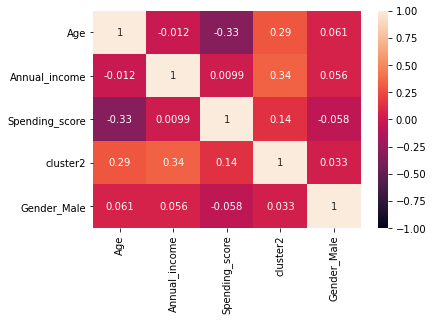

In [29]:
clustered_dummy_corr = clustered_dummy.corr()

sns.heatmap(clustered_dummy_corr, vmin=-1, vmax=1, annot=True);

Nossa variável target é Spending score, não existe nenhuma correlação forte, a mais forte é com a Idade. 

De qualquer forma vamos tentar criar uma regressão linear multipla com esses dados (exceto cluster)

In [30]:
# separando entre as features e a variável target

X = clustered_dummy.drop(columns = ['cluster2', 'Spending_score'], axis = 1)
y = clustered_dummy['Spending_score']


In [31]:
## importando bibliotecas do sklearn

from sklearn.linear_model import LinearRegression

estimador = LinearRegression()

In [32]:
## importando a biblioteca train_test_split

from sklearn.model_selection import train_test_split


X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
## modelo

modelo = estimador.fit(X_treino, y_treino)

print("Intercepto:", modelo.intercept_)
print("Coeficiente angular:", modelo.coef_)

Intercepto: 71.9049828488992
Coeficiente angular: [-0.58792363  0.05386299 -1.19846561]


In [34]:
## fazendo predições

y_pred = modelo.predict(X_teste)

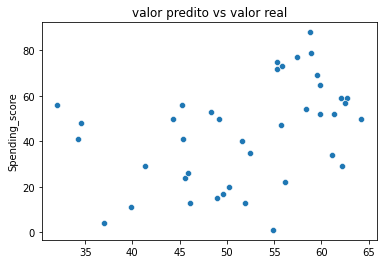

In [35]:
# predito x real

plt.title("valor predito vs valor real")
sns.scatterplot(x=y_pred, y=y_teste)
plt.show()

Conforme observamos os dados não estão com uma característica linear - **Talvez não esteja bacana esse modelo**

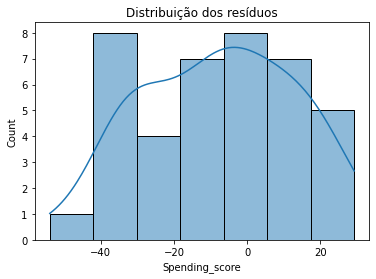

In [36]:
resid = y_teste - y_pred

plt.title("Distribuição dos resíduos")
sns.histplot(resid, kde=True)
plt.show()

Não parece uma distribuição normal :(

In [37]:
## métricas de avaliação
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_teste, y_pred))
print('MSE:', metrics.mean_squared_error(y_teste, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred)))

MAE: 18.151395326685112
MSE: 480.67314170724813
RMSE: 21.924259205438346


Apesar dos erros bem altos temos a equação que define o **Score** é:
    
$$ Score = 71.9 -0.58792363*Age  + 0.05386299*Annual income  - 1.19846561*Gender Male $$

## Agora vamos explorar as regressões para cada cluster

Intercepto: 39.10605670368616
Coeficienter angular: [-0.51882611  0.1787186  -0.25017771]

####################################################



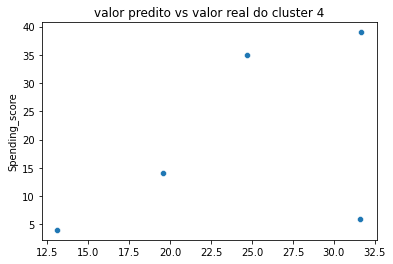

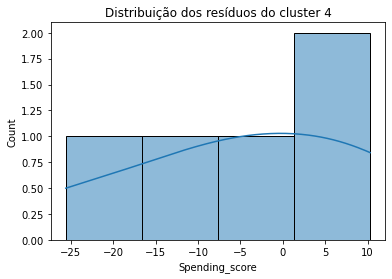


####################################################


Métricas de avaliação do cluster4 :
Para o cluster  4 R^2: 0.135089862144403
Para o cluster  4 MAE: 11.575799713596933
Para o cluster  4 MSE: 185.64431198932533
Para o cluster  4 RMSE: 13.625135301688763
Intercepto: 78.6472485802311
Coeficienter angular: [ 0.30393988 -0.19218917  1.01954106]

####################################################



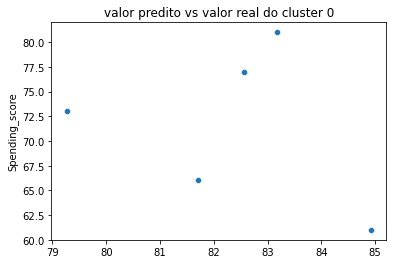

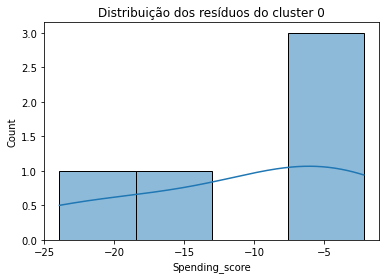


####################################################


Métricas de avaliação do cluster0 :
Para o cluster  0 R^2: -2.396663533792679
Para o cluster  0 MAE: 10.725368670163302
Para o cluster  0 MSE: 178.80036841884666
Para o cluster  0 RMSE: 13.371625496507395
Intercepto: 27.728397696085853
Coeficienter angular: [ 0.17722577  0.24136678 -3.45958681]

####################################################



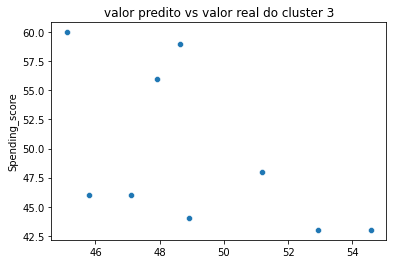

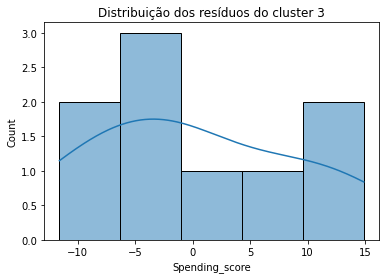


####################################################


Métricas de avaliação do cluster3 :
Para o cluster  3 R^2: -0.7253437728964895
Para o cluster  3 MAE: 7.1390094056884585
Para o cluster  3 MSE: 73.65726872439582
Para o cluster  3 RMSE: 8.582381296842726
Intercepto: 59.30060347379416
Coeficienter angular: [ 0.05513535 -0.23833067  5.21106928]

####################################################



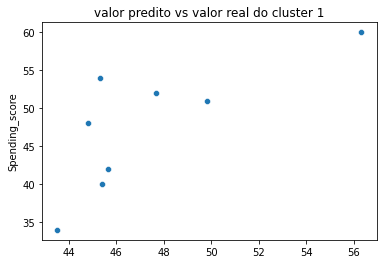

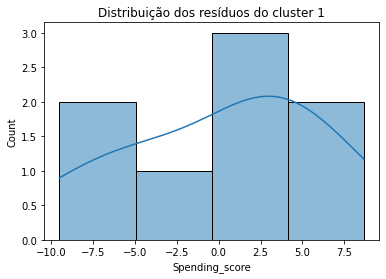


####################################################


Métricas de avaliação do cluster1 :
Para o cluster  1 R^2: 0.49510888214702475
Para o cluster  1 MAE: 4.955958459019618
Para o cluster  1 MSE: 31.547805942094502
Para o cluster  1 RMSE: 5.61674335732856
Intercepto: 69.77761755021629
Coeficienter angular: [ 0.39661169 -0.02452085  2.8042502 ]

####################################################



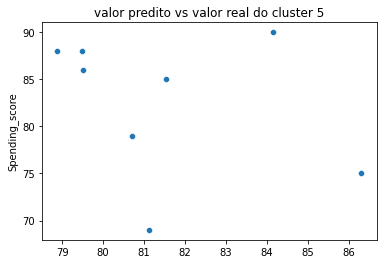

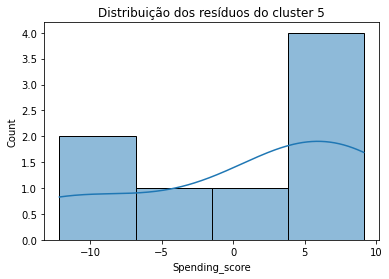


####################################################


Métricas de avaliação do cluster5 :
Para o cluster  5 R^2: -0.3521677986040497
Para o cluster  5 MAE: 7.323750675292866
Para o cluster  5 MSE: 65.24209628264539
Para o cluster  5 RMSE: 8.077257968063506
Intercepto: 0.6651232536885345
Coeficienter angular: [ 0.17445591  0.12859333 -3.10151255]

####################################################



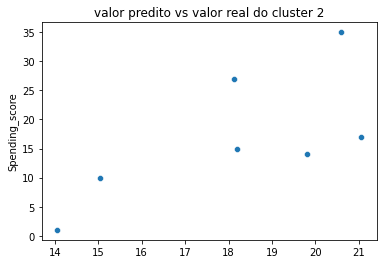

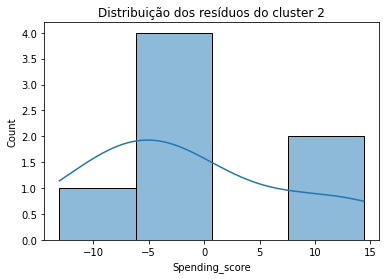


####################################################


Métricas de avaliação do cluster2 :
Para o cluster  2 R^2: 0.2691842241448814
Para o cluster  2 MAE: 7.774723574819804
Para o cluster  2 MSE: 77.46647224064257
Para o cluster  2 RMSE: 8.801503976062419


,cluster,RMSE
3,1.0,5.616743
4,5.0,8.077258
2,3.0,8.582381
5,2.0,8.801504
1,0.0,13.371625
0,4.0,13.625135


In [118]:
best_result = pd.DataFrame({'cluster': [],
                           'RMSE': []})

for cluster in clustered_dummy['cluster2'].unique().tolist():
    dataframe = clustered_dummy[clustered_dummy['cluster2'] == cluster]
    X = dataframe.drop(columns = ['cluster2','Spending_score'], axis = 1)
    y = dataframe['Spending_score']
    X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    estimador = LinearRegression()
    modelo = estimador.fit(X_train, y_train)
    print("Intercepto:", modelo.intercept_)
    print("Coeficienter angular:", modelo.coef_)

    print("\n####################################################\n")

    # 5)
    predictions = modelo.predict(X_test)

    plt.title("valor predito vs valor real do cluster " + str(int(cluster)))
    sns.scatterplot(x=predictions, y=y_test)
    plt.show()

    plt.title("Distribuição dos resíduos do cluster " + str(int(cluster)) )
    sns.histplot(y_test-predictions, kde=True)
    plt.show()

    print("\n####################################################\n")

    print("\nMétricas de avaliação do cluster" + str(int(cluster)),':')

# 6)
    from sklearn import metrics

    print('Para o cluster ', cluster,'R^2:', metrics.r2_score(y_test, predictions))
    print('Para o cluster ', cluster,'MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('Para o cluster ', cluster,'MSE:', metrics.mean_squared_error(y_test, predictions))
    print('Para o cluster ', cluster,'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    
    best_result = best_result.append({'cluster': cluster,
                                     'RMSE': np.sqrt(metrics.mean_squared_error(y_test, predictions))} , 
                                     ignore_index = True)

best_result.sort_values(by = 'RMSE', ascending = True)

Com essa visualização observamos que o cluster que obtemos menos erro do Score de gastos é com o cluster 1 :)